## Wrangling & Analyzing Twitter Data¶

#### Abdulmajeed Alangari


### Introduction:
In this project we will gather, assess and clean data. There will be visualization and analysis to help us reach to the best form of completing this project. The data will be prvided offline from Udacity, because there is not enough time for me to contact Twitter.

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sys
import time
import requests 
import sqlalchemy 
import pickle
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json 
import os
import matplotlib.patches as mpatches
import re
import requests
import warnings
from timeit import default_timer as timer
from scipy import stats
from tqdm import *
%matplotlib inline

### Gathering Data

In [3]:
# Read the twitter_archive_enhanced.csv file provided offline by Udacity and 
# set it as a dataframe called df.
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
PixPred = pd.read_csv('image-predictions.tsv', sep='\t' )
PixPred

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [5]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [6]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [8]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 7597

Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168:

Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442:

Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717:

Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

In [9]:
tweetz = []

readtweets = open('tweet-json.txt', "r")

for line in readtweets:
    try:
        tweet = json.loads(line)
        tweetz.append(tweet)
    except:
        continue
        
readtweets.close()

In [10]:
tweetstored = pd.DataFrame()


In [11]:
tweetstored['tweet_id'] = list(map(lambda tweet: tweet['id'], tweetz))
tweetstored['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweetz))
tweetstored['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweetz))

In [12]:
tweetstored.head(4)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908

### Assessing Data

In [13]:
df.head(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888202515573088257                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25 01:55:32 +0000   
13  2017-07-25 00:10:02 +0000   
14  2017-07-24 17:02:04 +0000   
15  2017-07-24 00:19:32 +0000   
16  2017-07-23 00:22:39 +0000   
17  2017-07-22 16:56:37 +0000   
18  2017-07-22 00:23:06 +0000   
19  2017-07-21 01:02:36 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17  <a href="http://twitter.com/download/iphone" r...   
18  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   

                                                 text  retweeted_status_id  \
0   This is Phineas. He's a mystical boy. Only eve...                  NaN   
1   This is Tilly. She's just checking pup on you....                  NaN   
2   This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3   This is Darla. She commenced a snooze mid meal...                  NaN   
4   This is Franklin. He would like you to stop ca...                  NaN   
5   Here we have a majestic great white breaching ...                  NaN   
6   Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7   When you watch your own

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [16]:
PixPred.head(20)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   

    img_num                      p1   p1_conf  p1_dog                  p2  \
0         1  Welsh_springer_spaniel  0.465074    True              collie   
1         1                 redbone  0.506826    True  miniature_pinscher   
2         1         German_shepherd  0.596461    True            malinois   
3         1     Rhodesian_ridgeback  0.408143    True             redbone   
4         1      miniature_pinscher  0.560311    True          Rottweiler   
5         1    Bernese_mountain_dog  0.651137    True    English_springer   
6         1              box_turtle  0.933012   False          mud_turtle   
7         1                    chow  0.692517    True     Tibetan_mastiff   
8         1           shopping_cart  0.962465   False     shopping_basket   
9         1        miniature_poodle  0.201493    True            komondor   
10        1        golden_retriever  0.775930    True     Tibetan_mastiff   
11        1           Gordon_setter  0.503672    True   Yorkshire_terrier   
12        1            Walker_hound  0.260857    True    English_foxhound   
13        1                     pug  0.489814    True        bull_mastiff   
14        1              bloodhound  0.195217    True     German_shepherd   
15        1                   Lhasa  0.582330    True            Shih-Tzu   
16        1          English_setter  0.298617    True        Newfoundland   
17        1                     hen  0.965932   False                cock   
18        1        desktop_computer  0.086502   False                desk   
19        1       Italian_greyhound  0.176053    True         toy_terrier   

     p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0   0.156665    True            Shetland_sheepdog  0.061428    True  
1   0.074192    True          Rhodesian_ridgeback  0.072010    True  
2   0.138584    True                   bloodhound  0.116197    True  
3   0.360687    True           miniature_pinscher  0.222752    True  
4   0.243682    True                     Doberman  0.154629    True  
5   0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6   0.045885   False                     terrapin  0.017885   False  
7   0.058279    True                     fur_coat  0.054449   False  
8   0.014594   False             golden_retriever  0.007959    True  
9   0.192305    True  soft-coated_wheaten_terrier  0.082086    True  
10  0.093718    True           Labrador_retriever 

In [17]:
PixPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
PixPred.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [19]:
tweetstored.head(20)

tweet_id  retweet_count  favorite_count
0   892420643555336193           8853           39467
1   892177421306343426           6514           33819
2   891815181378084864           4328           25461
3   891689557279858688           8964           42908
4   891327558926688256           9774           41048
5   891087950875897856           3261           20562
6   890971913173991426           2158           12041
7   890729181411237888          16716           56848
8   890609185150312448           4429           28226
9   890240255349198849           7711           32467
10  890006608113172480           7624           31166
11  889880896479866881           5156           28268
12  889665388333682689           8538           38818
13  889638837579907072           4735           27672
14  889531135344209921           2321           15359
15  889278841981685760           5637           25652
16  888917238123831296           4709           29611
17  888804989199671297           4559           26080
18  888554962724278272           3732           20290
19  888078434458587136           3653           22201

In [20]:
tweetstored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
tweetstored.describe()

tweet_id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

### Cleaning Data

In [22]:
df_clean = df.copy()
Pix_clean = PixPred.copy()
T_clean = tweetstored.copy()

###### Define

Adding PixPred & tweetstored to df_clean

###### Code

In [23]:
df_clean = pd.merge(left=df_clean, right= T_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [24]:
df_clean = df_clean.merge(Pix_clean, on='tweet_id', how='inner')


In [25]:
#Test

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

###### Define
Some columns should dropped, because it not necessary for analysis process.

###### Code

In [26]:
print(list(df_clean))
df_clean = df_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                       'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


In [27]:
#Test

list(df_clean)


['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null boo

###### Define
Use for datatypes (doggo, floofer, pupper and puppo columns) to have columns dogs and dog_stage, then, drop dogs and sort dog_stage and remove duplicates.

###### Code

In [29]:
df_clean['dog_stage'] = df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)




In [30]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean = df_clean.drop(columns, axis=1)

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
dog_stage             337 non-null object


In [32]:
df_clean.head(4)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   

   rating_denominator     name  retweet_count  favorite_count  \
0                  10  Phineas           8853           39467   
1                  10    Tilly           6514           33819   
2                  10   Archie           4328           25461   
3                  10    Darla           8964           42908   

                                           jpg_url    ...               p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg    ...           orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg    ...        Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg    ...        Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg    ...      paper_towel   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog        p3   p3_conf  \
0  0.097049   False               bagel  0.085851   False    banana  0.076110   
1  0.323581    True            Pekinese  0.090647    True  papillon  0.068957   
2  0.716012    True            malamute  0.078253    True    kelpie  0.031379   
3  0.170278   False  Labrador_retriever  0.168086    True   spatula  0.040836   

   p3_dog  dog_stage  
0   False        NaN  
1    True        NaN  
2    True        NaN  
3   False        NaN  

[4 rows x 21 columns]

In [33]:
#Test

df_clean['dog_stage'].value_counts()


pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_stage, dtype: int64

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
dog_stage             337 non-null object


#### Define

Get the right datatype.

#### Code

In [35]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['img_num'] = df_clean['img_num'].astype('category')
df_clean['dog_stage'] = df_clean['dog_stage'].astype('category')

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null category
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
dog_stage             337 non-

#### Define

Replace missing dog stages by 'None'.

#### Code 

In [37]:
type_stages = ['dog_stage']

for dog_stages in type_stages:
    df_clean.loc[df_clean[dog_stages] == 'None', dog_stages] = None

In [38]:
# Test

df_clean.dog_stage.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_stage, dtype: int64

In [39]:
df_clean.dog_stage.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dog_stage, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null category
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
dog_stage             337 non-

#### Define

There are some retweets that we can point out as they start with 'RT' in the text column. We don't want them, so we'll take them out.

#### Code

In [41]:
df_clean.loc[df_clean['text'].str.startswith('RT') != False]

tweet_id           timestamp  \
32    885311592912609280 2017-07-13 01:35:06   
67    877611172832227328 2017-06-21 19:36:23   
81    873697596434513921 2017-06-11 00:25:14   
109   867072653475098625 2017-05-23 17:40:04   
129   861769973181624320 2017-05-09 02:29:07   
133   860924035999428608 2017-05-06 18:27:40   
170   851953902622658560 2017-04-12 00:23:33   
171   851861385021730816 2017-04-11 18:15:55   
186   847971574464610304 2017-04-01 00:39:12   
209   842892208864923648 2017-03-18 00:15:37   
215   841833993020538882 2017-03-15 02:10:39   
226   839290600511926273 2017-03-08 01:44:07   
229   838916489579200512 2017-03-07 00:57:32   
238   837012587749474308 2017-03-01 18:52:06   
263   832769181346996225 2017-02-18 01:50:19   
269   832215726631055365 2017-02-16 13:11:05   
270   832040443403784192 2017-02-16 01:34:34   
284   829878982036299777 2017-02-10 02:25:42   
318   824796380199809024 2017-01-27 01:49:15   
327   823269594223824897 2017-01-22 20:42:21   
331   822647212903690241 2017-01-21 03:29:14   
337   821813639212650496 2017-01-18 20:16:54   
346   820446719150292993 2017-01-15 01:45:15   
355   819015337530290176 2017-01-11 02:57:27   
356   819015331746349057 2017-01-11 02:57:26   
361   818588835076603904 2017-01-09 22:42:41   
370   817181837579653120 2017-01-06 01:31:47   
374   816829038950027264 2017-01-05 02:09:53   
380   816014286006976512 2017-01-02 20:12:21   
390   813944609378369540 2016-12-28 03:08:11   
...                  ...                 ...   
504   794355576146903043 2016-11-04 01:48:22   
509   793614319594401792 2016-11-02 00:42:53   
532   791026214425268224 2016-10-25 21:18:40   
535   790723298204217344 2016-10-25 01:14:59   
551   788070120937619456 2016-10-17 17:32:13   
563   786036967502913536 2016-10-12 02:53:11   
578   783347506784731136 2016-10-04 16:46:14   
586   782021823840026624 2016-10-01 00:58:26   
597   780496263422808064 2016-09-26 19:56:24   
598   780476555013349377 2016-09-26 18:38:05   
610   778396591732486144 2016-09-21 00:53:04   
617   777641927919427584 2016-09-18 22:54:18   
620   776819012571455488 2016-09-16 16:24:19   
627   775898661951791106 2016-09-14 03:27:11   
646   772615324260794368 2016-09-05 02:00:22   
656   771171053431250945 2016-09-01 02:21:21   
665   770093767776997377 2016-08-29 03:00:36   
685   766078092750233600 2016-08-18 01:03:45   
704   761750502866649088 2016-08-06 02:27:27   
708   761371037149827077 2016-08-05 01:19:35   
723   759566828574212096 2016-07-31 01:50:18   
727   759159934323924993 2016-07-29 22:53:27   
739   757729163776290825 2016-07-26 00:08:05   
742   757597904299253760 2016-07-25 15:26:30   
757   754874841593970688 2016-07-18 03:06:01   
775   752309394570878976 2016-07-11 01:11:51   
1035  711998809858043904 2016-03-21 19:31:59   
1587  675489971617296384 2015-12-12 01:38:53   
1977  667550904950915073 2015-11-20 03:51:52   
1978  667550882905632768 2015-11-20 03:51:47   

                                                   text  \
32    RT @dog_rates: This is Lilly. She just paralle...   
67    RT @rachel2195: @dog_rates the boyfriend and h...   
81    RT @dog_rates: This is Walter. He won't start ...   
109   RT @rachaeleasler: these @dog_rates hats are 1...   
129   RT @dog_rates: "Good afternoon class today we'...   
133   RT @tallylott: h*ckin adorable promposal. 13/1...   
170   RT @dog_rates: This is Astrid. She's a guide d...   
171   RT @eddie_coe98: Thanks @dog_rates completed m...   
186   RT @basic_vacek_: I love my new mug easy 13/10...   
209   RT @dog_rates: This is Stephan. He just wants ...   
215   RT @dog_rates: This is Ken. His cheeks are mag...   
226   RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...   
229   RT @KibaDva: I collected all the good dogs!! 1...   
238   RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...   
263   RT @EmilieGambril: 12/10 h*cking excited about...   
269   RT @dog_rates: This is Moreton. He's the Good ...   
270   RT @dog_rates: This is Klein. 

In [42]:
df_clean = df_clean.loc[df_clean['text'].str.startswith('RT') == False]

In [43]:
#Test

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns]
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
retweet_count         1993 non-null int64
favorite_count        1993 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null category
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
dog_stage             326 non-

#### Define

Remove all tweets that don't include any image.

#### Code

In [44]:
df_clean = df_clean.dropna(subset=['expanded_urls'])

In [45]:
# Test

df_clean['expanded_urls'].isnull().value_counts()

False    1993
Name: expanded_urls, dtype: int64

#### Define

Drop numerator and denominator columns

#### Code

In [46]:
df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [47]:
# Test 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id          1993 non-null object
timestamp         1993 non-null datetime64[ns]
text              1993 non-null object
expanded_urls     1993 non-null object
name              1993 non-null object
retweet_count     1993 non-null int64
favorite_count    1993 non-null int64
jpg_url           1993 non-null object
img_num           1993 non-null category
p1                1993 non-null object
p1_conf           1993 non-null float64
p1_dog            1993 non-null bool
p2                1993 non-null object
p2_conf           1993 non-null float64
p2_dog            1993 non-null bool
p3                1993 non-null object
p3_conf           1993 non-null float64
p3_dog            1993 non-null bool
dog_stage         326 non-null category
dtypes: bool(3), category(2), datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 243.7+ KB


#### Define

Need to replace name that are likely not real such as 'a', 'an' etc.

#### Code 

In [48]:
dogsname = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

for word in dogsname:
    df_clean.loc[df_clean.name == word, 'name'] = None

In [49]:
# Test 

df_clean.name.value_counts()

Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Lola          7
Daisy         7
Toby          7
Stanley       6
Bella         6
Koda          6
Bo            6
Jax           6
Scout         5
Bailey        5
Oscar         5
Chester       5
Buddy         5
Leo           5
Milo          5
Rusty         5
Dave          5
Louis         5
Larry         4
Bentley       4
Gary          4
Alfie         4
             ..
Odin          1
Torque        1
Dietrich      1
Margo         1
Lorelei       1
Geoff         1
Benny         1
Clybe         1
Brooks        1
Lassie        1
Lambeau       1
Jerome        1
Ed            1
Nugget        1
Charleson     1
Joey          1
Rodney        1
Rooney        1
Oshie         1
Colin         1
Venti         1
Tedrick       1
Lucia         1
Tupawc        1
Schnitzel     1
Geno          1
Lilli         1
Halo          1
Bell          1
Gunner        1
Name: name, Length: 923,

##### Data Quality
1- Missing data in df file.

2- Many columns have no purpuse in our analysis.

3- Tweets with no images.

4- The numerator and denominator columns have invalid values.

5- In df in_reply_to_status_id & in_reply_to_status_user_id are duplicated.

6- Tweet_id, timestamp, img_num and dog_stage need to be converted into the right datatype.

7- In PixPred values are 2075 out of 2356.

8- Name is sometimes not an actual name.

##### Tidiness
1- Adding all the tables to one table.

2- Some columns should dropped, because it not necessary for analysis process.

3- Use melt for datatypes (doggo, floofer, pupper and puppo columns) to have columns dogs and dog_stage, then, drop dogs and sort dog_stage and remove duplicates.

In [50]:
# Save clean dataset for next sections

df_clean.to_csv('twitter_archive_master.csv', index=False)

### visualization

Text(0.5,1,'Most Poplur Dogs')

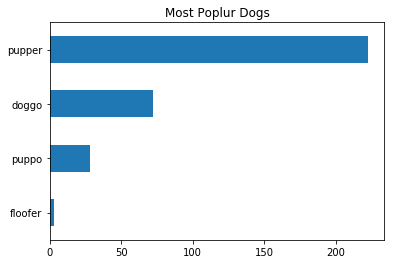

In [51]:
df_clean['dog_stage'].value_counts()[12::-1].plot(kind='barh')
plt.title('Most Poplur Dogs')

Text(0.5,1,'Retweet by Favorite')

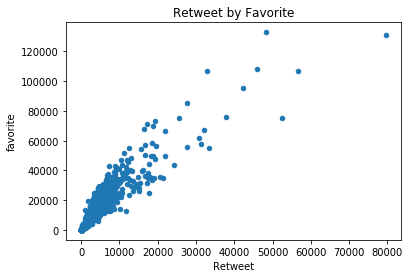

In [52]:
df_clean.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.xlabel('Retweet')
plt.ylabel('favorite')
plt.title('Retweet by Favorite')

Text(0.5,1,'Most popular Dog breeds')

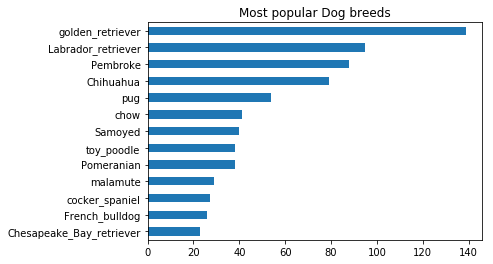

In [53]:
df_clean['p1'].value_counts()[12::-1].plot(kind='barh')
plt.title('Most popular Dog breeds')